In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder 


In [31]:
# Read the csv file into a pandas DataFrame
ml_mrg2_data = pd.read_csv('ml_data.csv')
ml_mrg2_data.head(2)

,Year,State,General:Total Ballots Counted,VEP,Total registered,Primary:Total Ballots Counted,Re-election
0,2000,0,1912592,3241682,2411000,489573,0
1,2004,0,1890317,3292608,2418000,863695,1


In [3]:
ml_mrg2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Year                           255 non-null    int64
 1   State                          255 non-null    int64
 2   General:Total Ballots Counted  255 non-null    int64
 3   VEP                            255 non-null    int64
 4   Total registered               255 non-null    int64
 5   Primary:Total Ballots Counted  255 non-null    int64
 6   Re-election                    255 non-null    int64
dtypes: int64(7)
memory usage: 14.1 KB


In [7]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
#r = ml_mrg2_data['Re-election']
X = ml_mrg2_data.drop(columns=['Total registered', 'General:Total Ballots Counted', 'Re-election'])
y = (ml_mrg2_data["General:Total Ballots Counted"]/1000000).values.reshape(-1, 1)
print(X.shape, y.shape)
#print(X.shape, y.shape, r.shape)
### END SOLUTION

(255, 4) (255, 1)


In [8]:
X.head(2)

,Year,State,VEP,Primary:Total Ballots Counted
0,2000,0,3241682,489573
1,2004,0,3292608,863695


In [9]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
### END SOLUTION

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train[["VEP","Primary:Total Ballots Counted"]])

### END SOLUTION
X_scaler 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [12]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train[["VEP","Primary:Total Ballots Counted"]])
X_test_scaled = X_scaler.transform(X_test[["VEP","Primary:Total Ballots Counted"]])

### END SOLUTION
X_train_scaled

array([[-5.16074871e-01, -4.98119942e-01],
       [-5.23315427e-01, -5.93002082e-01],
       [ 1.57315001e-01, -3.05908989e-01],
       [ 1.07494758e+00,  6.44868360e-01],
       [ 1.44318420e-01,  2.58707319e-02],
       [ 7.81275377e-01,  1.24426859e+00],
       [-6.48832418e-01, -5.30566238e-01],
       [ 1.15523177e+00,  2.00141396e+00],
       [-6.33281163e-01, -6.36475453e-01],
       [ 1.90378327e-01,  7.25272815e-01],
       [-1.54131430e-01, -5.77408820e-01],
       [-7.39275386e-02, -4.43237566e-02],
       [ 7.55488931e-01,  2.07181751e-01],
       [-6.50248124e-01, -3.61850612e-01],
       [-2.44026596e-01, -5.14510930e-01],
       [-4.22961691e-02, -6.06785925e-01],
       [-8.77867757e-01, -7.05254345e-01],
       [-5.16104983e-01, -6.72615788e-01],
       [ 7.43611485e-01,  5.21387460e-01],
       [-8.91933286e-01, -7.04060469e-01],
       [-7.79511096e-01, -6.97046059e-01],
       [-8.14805042e-01, -4.95322085e-01],
       [ 4.45039995e-01,  2.42241395e-01],
       [ 2.

In [14]:
X_train[["VEP","Primary:Total Ballots Counted"]] = X_train_scaled
X_test[["VEP","Primary:Total Ballots Counted"]] = X_test_scaled

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [15]:
X_test

,Year,State,VEP,Primary:Total Ballots Counted
190,2000,38,1.179477,1.190641
6,2004,1,-0.884044,-0.702975
79,2016,15,-0.445182,-0.438909
205,2000,41,-0.861013,-0.627641
117,2008,23,-0.098280,-0.501564
...,...,...,...,...
60,2000,12,-0.782411,-0.620767
101,2004,20,-0.084629,-0.221108
172,2008,34,-0.871465,-0.694039
248,2012,49,0.013855,0.127111


In [16]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.09766850927878967, R2: 0.9853808194034838


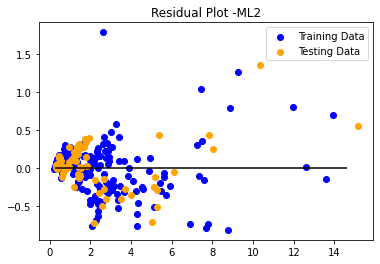

In [18]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

%matplotlib inline
### BEGIN SOLUTION
predictions = model.predict(X_test)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot -ML2")
plt.show()
### END SOLUTION

In [19]:
X_test_predict = X_test

In [20]:
X_test_predict["Predictions"] = model.predict(X_test)

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
X_test_predict["Actuals"] = y_test

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
X_test_predict["Residual Testing"] = X_test_predict["Predictions"]-X_test_predict["Actuals"] 

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
X_test_training = X_train
X_test_training

,Year,State,VEP,Primary:Total Ballots Counted
224,2016,44,-0.516075,-0.498120
144,2016,28,-0.523315,-0.593002
108,2012,21,0.157315,-0.305909
178,2012,35,1.074948,0.644868
73,2012,14,0.144318,0.025871
...,...,...,...,...
106,2004,21,0.091401,-0.176372
14,2016,2,0.140738,0.132545
92,2008,18,-0.225977,-0.293526
179,2016,35,1.095813,1.824967


In [24]:
X_test_training["Residual Training"] = model.predict(X_train) - y_train
X_test_training.head(2)

C:\Users\VEA\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,State,VEP,Primary:Total Ballots Counted,Residual Training
224,2016,44,-0.516075,-0.498120,0.134093
144,2016,28,-0.523315,-0.593002,0.141858


In [25]:
X_test_training_sort = X_test_training.sort_values(by=["Residual Training"], ascending=False)
X_test_training_sort.head(5)

,Year,State,VEP,Primary:Total Ballots Counted,Residual Training
128,2012,25,0.067288,-0.463364,1.788966
218,2012,43,2.860228,0.864787,1.270198
215,2000,43,2.122528,0.767110,1.037093
20,2000,4,3.712252,5.395115,0.809422
217,2008,43,2.575805,2.568515,0.796403


In [26]:
 X_test_predict_sort = X_test_predict.sort_values(by=["Residual Testing"], ascending=False)
 X_test_predict_sort.head(5)

,Year,State,VEP,Primary:Total Ballots Counted,Predictions,Actuals,Residual Testing
219,2016,43,3.177814,2.595707,10.334098,8.975000,1.359098
24,2016,4,5.007414,5.910588,15.162928,14.610509,0.552419
190,2000,38,1.179477,1.190641,5.352851,4.912185,0.440666
216,2004,43,2.304910,0.467245,7.846516,7.410765,0.435751
10,2000,2,-0.189675,-0.398912,1.953680,1.559520,0.394160


In [27]:
# For Sorted Predicted data...
# create output for State interpreted as label
X_test_predict_sort_label= X_test_predict_sort

In [29]:
from sklearn.preprocessing import LabelEncoder 
# show output with State interpreted as label
X_test_predict_sort_label["State"] = labelencoder.inverse_transform( X_test_predict_sort['State'])
X_test_predict_sort_label

NameError: name 'labelencoder' is not defined

In [32]:
# For Sorted Training data...
# create output for State interpreted as label
X_test_training_sort_label= X_test_training_sort

In [33]:
# show output with State interpreted as label
X_test_training_sort_label["State"] = labelencoder.inverse_transform( X_test_training_sort['State'])
X_test_training_sort_label

NameError: name 'labelencoder' is not defined